In [5]:
import os
os.listdir()


['.config', 'CLDB.csv', 'sample_data']

In [6]:
!pip install pandas numpy scikit-learn matplotlib


In [7]:
import pandas as pd

data = pd.read_csv("/content/CLDB.csv")

print("Dataset Loaded Successfully!")
print(data.head())
print("\nColumns:")
print(data.columns)


Dataset Loaded Successfully!
   gender   age  hypertension  heart_disease  smoking_history    bmi  \
0       0  80.0             0              1                4  25.19   
1       0  54.0             0              0                0  27.32   
2       1  28.0             0              0                4  27.32   
3       0  36.0             0              0                1  23.45   
4       1  76.0             1              1                1  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0  

Columns:
Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')



====== MODEL PERFORMANCE ======
Accuracy : 0.9578783151326054
Precision: 0.9122171945701357
Recall   : 0.5857059848925044
F1-Score : 0.7133757961783439
ROC-AUC  : 0.9601329128019792

Confusion Matrix:
 [[17412    97]
 [  713  1008]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98     17509
           1       0.91      0.59      0.71      1721

    accuracy                           0.96     19230
   macro avg       0.94      0.79      0.85     19230
weighted avg       0.96      0.96      0.95     19230



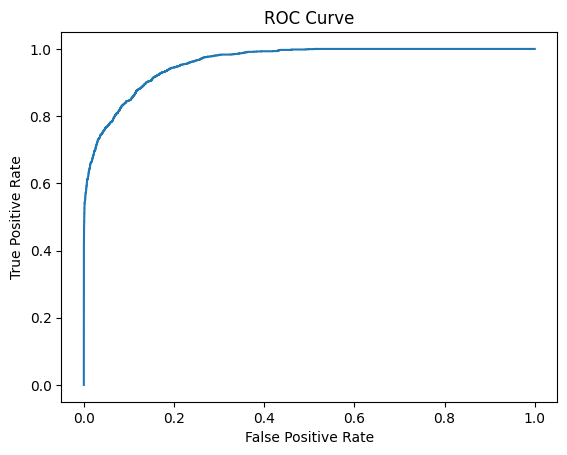

In [8]:
# =========================================
# FAST SVM DIABETES MODEL
# =========================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, confusion_matrix, classification_report,
                             roc_auc_score, roc_curve)

# Load dataset
data = pd.read_csv("/content/CLDB.csv")

# Convert categorical to numeric
data = pd.get_dummies(data, drop_first=True)

# Separate features and target
X = data.drop("diabetes", axis=1)
y = data["diabetes"]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Train SVM directly (NO GridSearch)
model = SVC(kernel='linear', probability=True)

model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Metrics
print("\n====== MODEL PERFORMANCE ======")
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1-Score :", f1_score(y_test, y_pred))
print("ROC-AUC  :", roc_auc_score(y_test, y_prob))

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)

plt.figure()
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()
